<a href="https://colab.research.google.com/github/AmitKadam7499/Smart_City_Traffic_Patterns/blob/main/Smart_City_Traffic_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import random

## Data Wrangling

In [2]:
df = pd.read_csv("/content/test_BdBKkAj.csv")

In [8]:
# smart_cities = ["Chennai", "Bangalore", "Thiruvananthapuram", "Mumbai"]

# # Generate random indices to select smart cities
# random_indices = [random.randint(0, 3) for _ in range(len(df))]

# # Assign smart cities randomly to the dataset
# df['SmartCity'] = [smart_cities[i] for i in random_indices]

In [9]:
# df = df.drop("Junction", axis=1)

In [3]:
df.head(5)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [5]:
df.shape

(11808, 3)

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.assign(
    Year=df['DateTime'].dt.year,
    Month=df['DateTime'].dt.month,
    Date_no=df['DateTime'].dt.day,
    Hour=df['DateTime'].dt.hour,
    Day=df['DateTime'].dt.strftime("%A")
)

In [7]:
df.head(2)

,DateTime,Junction,ID,Year,Month,Date_no,Hour,Day
0,2017-07-01 00:00:00,1,20170701001,2017,7,1,0,Saturday
1,2017-07-01 01:00:00,1,20170701011,2017,7,1,1,Saturday


## EDA

In [12]:
import plotly.express as px

In [ ]:
### Line Plots of Vehicle Count by Time Features and Smart Cities

<ipython-input-15-d252241a0806>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.lineplot(x=df[i], y="ID", data=df, hue="Junction", palette=colors)
<ipython-input-15-d252241a0806>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.lineplot(x=df[i], y="ID", data=df, hue="Junction", palette=colors)
<ipython-input-15-d252241a0806>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.lineplot(x=df[i], y="ID", data=df, hue="Junction", palette=colors)
<ipython-input-15-d252241a0806>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.lineplot(x=df[i], y="ID", data=df, hue="Junction", palette=colors)
<ipython-input-15-d252241a0806>:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.lineplot(x=df[i], y="ID", data=d

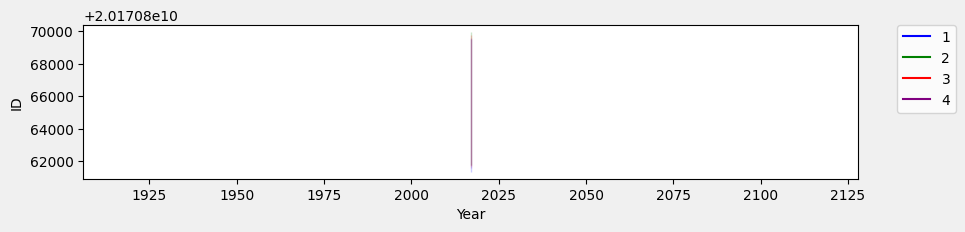

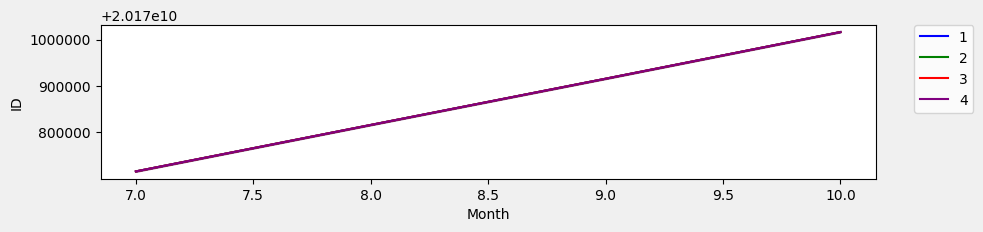

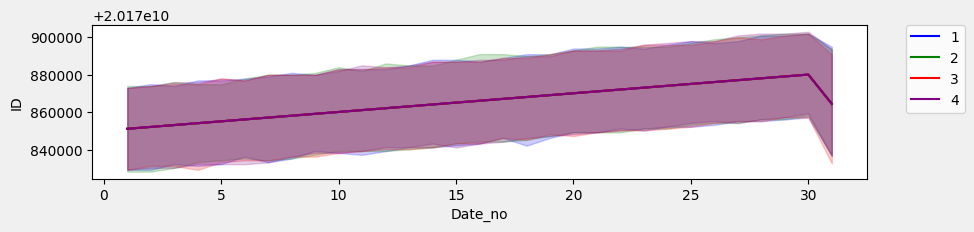

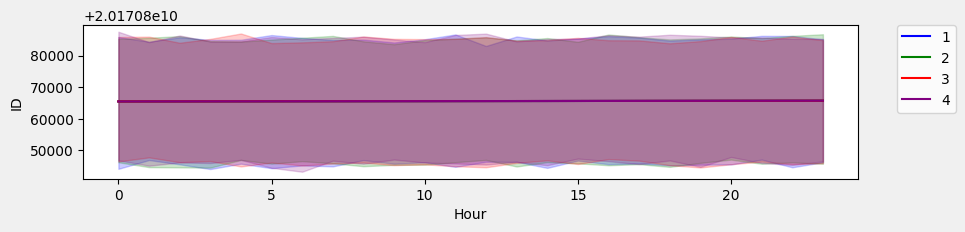

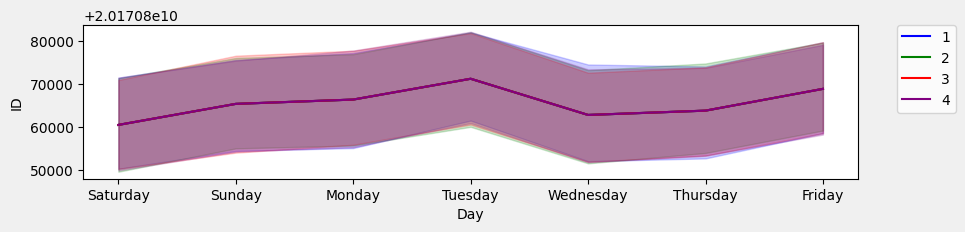

In [15]:
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]
colors = ["blue", "green", "red", "purple", "orange"]

for i in new_features:
    plt.figure(figsize=(10, 2),facecolor="#f0f0f0")
    ax = sns.lineplot(x=df[i], y="ID", data=df, hue="Junction", palette=colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [16]:
### Visualizing Average Traffic Patterns by SmartCity

In [19]:
df_monthly = (
    df.groupby(["Junction", "Month"])
    .agg({"ID": "mean"})
    .reset_index()
)

# Group by junction and day of week, average vehicles
df_day_week = (
    df.groupby(["Junction", "Day"])
    .agg({"ID": "mean"})
    .reset_index()
)

# Group by junction and day of month, average vehicles
df_day_month = (
    df.groupby(["Junction", "Date_no"])
    .agg({"ID": "mean"})
    .reset_index()
)

# Group by junction and hour, average vehicles
df_hourly = (
    df.groupby(["Junction", "Hour"])
    .agg({"ID": "mean"})
    .reset_index()
)

In [21]:
fig_monthly = px.line(df_monthly, x="Month", y="ID", color="Junction", title="Average Monthly Traffic")
fig_day_week = px.line(df_day_week, x="Day", y="ID", color="Junction", title="Average Traffic by Day of the Week")
fig_day_month = px.line(df_day_month, x="Date_no", y="ID", color="Junction", title="Average Traffic by Day of the Month")
fig_hourly = px.line(df_hourly, x="Hour", y="ID", color="Junction", title="Average Hourly Traffic")

# Display the plots
fig_monthly.show()
fig_day_week.show()
fig_day_month.show()
fig_hourly.show()

In [22]:
### Count of Traffic in Smart Cities Over the Years

<ipython-input-23-547b8af0a8de>:2: UserWarning:

The palette list has more values (5) than needed (4), which may not be intended.



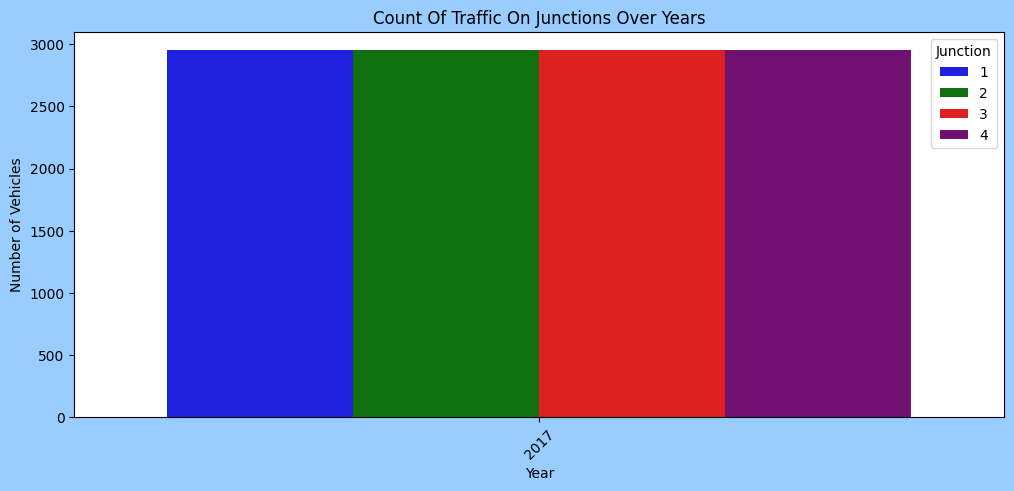

In [23]:
plt.figure(figsize=(12, 5), facecolor="#99ccff")
count = sns.countplot(data=df, x="Year", hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Year")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

### Pairplot of Numeric Columns with Hue by Junction

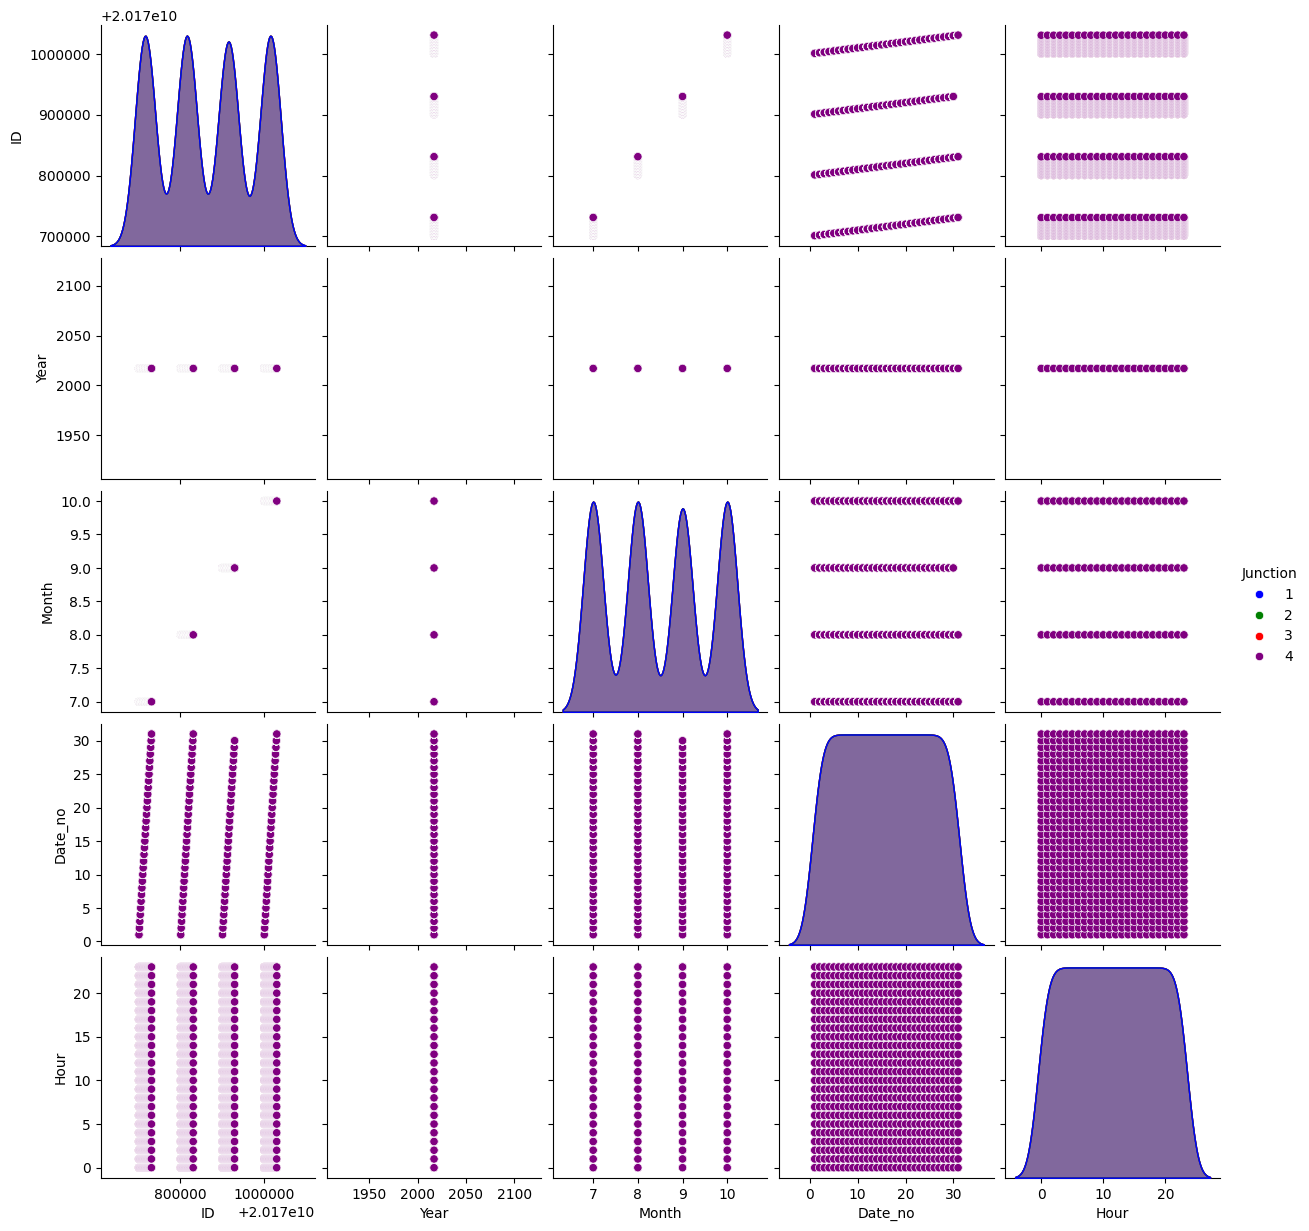

In [25]:
colors = ["blue", "green", "red", "purple"]
columns_to_include = ['ID', 'Year', 'Month', 'Date_no', 'Hour']
sns.pairplot(data=df, hue="Junction", palette=colors, vars=columns_to_include)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [27]:
features = ['Junction', 'Year', 'Month', 'Date_no', 'Hour', 'Day']
target = 'ID'

X = df[features]
y = df[target]
X = pd.get_dummies(X, columns=['Day'], drop_first=True)  # One-hot encode 'Day' and drop the first category


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

In [30]:
model = RandomForestRegressor(random_state=42)

In [31]:
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')


In [32]:
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 10911.238384970595
Mean Absolute Error: 82.98994686117018
R-squared: 0.9999991317610629


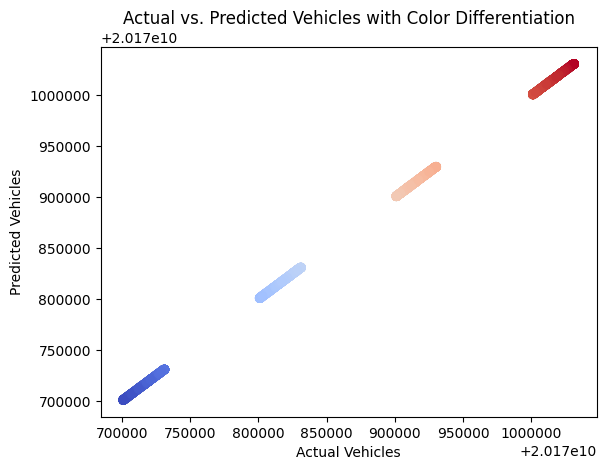

In [43]:
cmap = plt.get_cmap("coolwarm")  # You can choose any colormap you prefer
normalize = plt.Normalize(vmin=y_pred.min(), vmax=y_pred.max())
colors = cmap(normalize(y_pred))

# Create the scatter plot with colored points
plt.scatter(y_test, y_pred, c=colors)
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Actual vs. Predicted Vehicles with Color Differentiation")

# Create a colorbar for the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])  # Dummy array for the colorbar
cbar = plt.colorbar(sm, ax=ax)  # Make sure 'ax' is defined

plt.show()

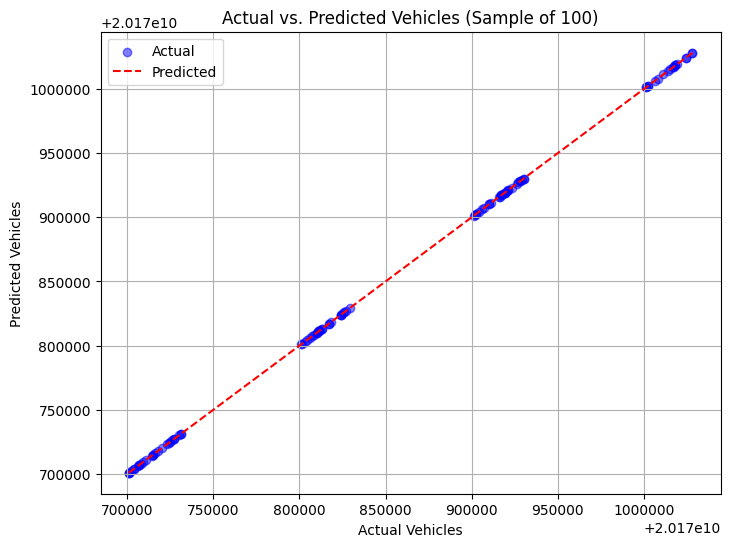

In [42]:
sample_size = 100
y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred[:sample_size]

# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_sample, y_pred_sample, color='blue', label='Actual', alpha=0.5)
plt.plot([min(y_test_sample), max(y_test_sample)], [min(y_test_sample), max(y_test_sample)], color='red', linestyle='--', label='Predicted')
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Actual vs. Predicted Vehicles (Sample of 100)")
plt.legend()
plt.grid(True)
plt.show()